## About Dataset

This dataset has funding information of the Indian startups from January 2015 to August 2017.  
Feature Details :  
1. SNo - Serial number.
2. Date - Date of funding in format DD/MM/YYYY.
3. StartupName - Name of the startup which got funded.
4. IndustryVertical - Industry to which the startup belongs.
5. SubVertical - Sub-category of the industry type.
6. CityLocation - City which the startup is based out of.
7. InvestorsName - Name of the investors involved in the funding round.
8. InvestmentType - Either Private Equity or Seed Funding.
9. AmountInUSD - Funding Amount in USD.
10. Remarks - Other information, if any.  

Insights -
 - Find out what type of startups are getting funded in the last few years?
 - Who are the important investors?
 - What are the hot fields that get a lot of funding these days?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [4]:
df = pd.read_csv('startup_funding.csv')

## Question 1
Check the trend of investments over the years. To check the trend, find -  
i. Total number of fundings done in each year.  
ii. Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.  
iii. Print year-wise total number of fundings also. Print years in ascending order.  
Note : Make sure to handle errors in the 'Date' feature.

In [3]:
yearwise_funding = {}
with open('startup_funding.csv') as f:
    data = csv.DictReader(f,skipinitialspace = True)
    for row in data:
        year = row['Date'].split('/')[-1]
        year=year.split('.')[-1]
        yearwise_funding[int(year)] = yearwise_funding.get(int(year),0)+1

In [4]:
yearwise_funding

{2017: 443, 2016: 993, 2015: 936}

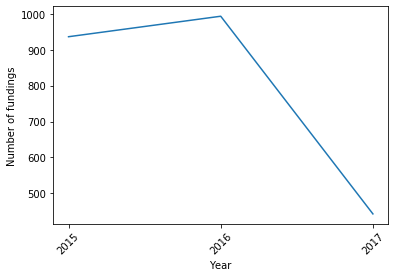

2015 936
2016 993
2017 443


In [5]:
years = list(sorted(yearwise_funding.keys()))
counts = [yearwise_funding[year] for year in sorted(yearwise_funding.keys())]
plt.plot(years,counts)
plt.xlabel('Year')
plt.ylabel('Number of fundings')
plt.xticks(list(yearwise_funding.keys()),rotation=45)
plt.show()
for i in range(len(years)):
    print(years[i],counts[i])

In [ ]:
df.head()

## Question 2
Find out which cities are generally chosen to start startups.  
i. Find top 10 Indian cities which have most number of startups ?  
ii. Plot a pie chart and visualise it.  
ii. Print the city name and number of startups in that city also.  
Note :
 - Take city name "Delhi" as "New Delhi".
 - Check the case-sensitivity of cities. (check for bangalore and take it as as Banglalore)  
 - For some startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
 - Print the city in descending order with respect to the number of startups.

In [ ]:
# for c in sorted(city_counts, key=city_counts.get, reverse=True):
#   print(c, city_counts[c])

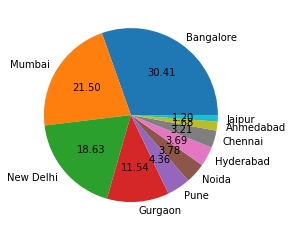

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [6]:
# taking first city
city_counts = {}
with open('startup_funding.csv') as f:
    data = csv.DictReader(f,skipinitialspace = True)
    for row in data:
        city = row['CityLocation'].split('/')[0].strip().lower()
        if city!='':
            if city == 'delhi':
                city='new delhi'
            city_counts[city]=city_counts.get(city,0)+1
        

city_counts = sorted(city_counts.items(), key=lambda x: x[1], reverse=True)
        
cities = [t[0].title() for t in city_counts][:10]
counts = [t[1] for t in city_counts][:10]

plt.pie(counts,labels=cities,autopct = '%.2f')
plt.show()
for i in range(10):
    print(cities[i],counts[i])

## Question 3
Find top 10 Indian cities with most fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).  
Print the city and percentage with 2 decimal place after rounding off.  


- Take city name "Delhi" as "New Delhi".
- Check the case-sensitivity of cities. (check for bangalore and take it as as Banglalore)  
- For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
- Print the city in descending order with respect to the percentage of funding.

In [ ]:
df.head()

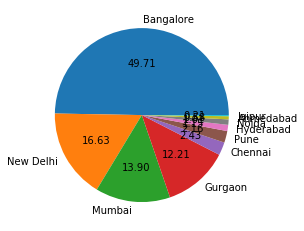

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [7]:
city_by_funds = {}
with open('startup_funding.csv') as f:
    data = csv.DictReader(f,skipinitialspace = True)
    for row in data:
        city = row['CityLocation'].split('/')[0].strip().lower()
        if city!='':
            if city == 'delhi':
                city='new delhi'
            funds = row['AmountInUSD']
            if funds=='':
                funds='0'
            funds = float(''.join(funds.split(',')))
            city_by_funds[city]=city_by_funds.get(city,0)+funds
        

city_by_funds = sorted(city_by_funds.items(), key=lambda x: x[1], reverse=True)
        
cities = [t[0].title() for t in city_by_funds][:10]
funds = np.array([t[1] for t in city_by_funds][:10])

plt.pie(funds,labels=cities,autopct = '%.2f')
plt.show()
for i in range(10):
    p = round((funds[i]/funds.sum())*100,2)
    print(cities[i],'{:.2f}'.format(p))

## Question 4
There are 4 different type of investments. Find out percentage of amount funded for each investment type.  
Plot a pie chart to visualise.  
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.  

   Note :
 - Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding".    Keep an eye out for any spelling mistakes (find by printing unique values from this column).  
 - Print the investment type in descending order with respect to the percentage of the amount funded.  

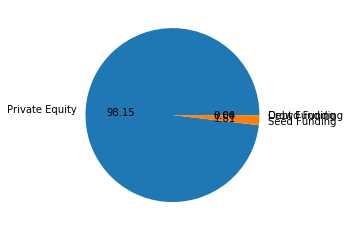

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [24]:
df = pd.read_csv('startup_funding.csv')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['AmountInUSD'].fillna('0',inplace = True)

d = {}
for i,row in df.iterrows():
    t = row['InvestmentType']
    funds = row['AmountInUSD']
    funds = float(''.join(funds.split(',')))
    d[t]=d.get(t,0)+funds
        

d = sorted(d.items(), key=lambda x: x[1], reverse=True)
        
types = [t[0] for t in d][:4]
funds = np.array([t[1] for t in d][:4])

plt.pie(funds,labels=types,autopct = '%.2f')
plt.show()
for i in range(4):
    p = round((funds[i]/funds.sum())*100,2)
    print(types[i],'{:.2f}'.format(p))

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Question 5
Which type of companies got funding more easily. To answer this question, find -
 - Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
 - Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.  
Note :  
 - Ecommerce is the right word in IndustryVertical, so correct it.
 - Print the industry in descending order with respect to the percentage of the amount funded.

In [4]:
df = pd.read_csv('startup_funding.csv')

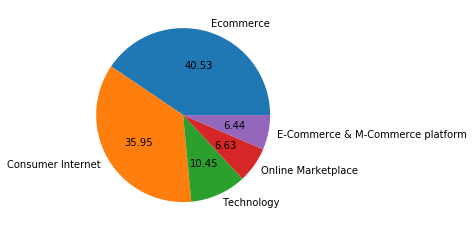

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [24]:
com = set()
for _,row in df[df['IndustryVertical'].notnull()].iterrows():
    x = row['IndustryVertical']
    if 'commerce' in x.lower():
        com.add(x)
        
com_set = set()
for x in com:
    words = x.split()
    for word in words:
        if 'commerce' in word.lower():
            com_set.add(word)
            
# used com_set to make corrections
df['IndustryVertical']=df['IndustryVertical'].replace({"E-Commerce":"Ecommerce"})
df['IndustryVertical']=df['IndustryVertical'].replace({"Ecommerce":"Ecommerce"})
df['IndustryVertical']=df['IndustryVertical'].replace({"eCommerce":"Ecommerce"})
df['IndustryVertical']=df['IndustryVertical'].replace({"ecommerce":"Ecommerce"})
df['IndustryVertical']=df['IndustryVertical'].replace({"ECommerce":"Ecommerce"})
df['AmountInUSD'].fillna('0',inplace = True)
# df = df.replace(to_replace = ['eCommerce','E-Commerce','ECommerce','ecommerce'],value = 'Ecommerce')


d = {}
for i,row in df.iterrows():
    industry = row['IndustryVertical']
    funds = row['AmountInUSD']
    funds = float(''.join(funds.split(',')))
    d[industry] = d.get(industry,0)+funds

d = sorted(d.items(), key=lambda x: x[1], reverse=True)[:6]

industry = []
funds = []

for t in d:
    if type(t[0])==str:
        industry.append(t[0])
        funds.append(t[1])
            
plt.pie(funds,labels = industry,autopct='%.2f')
plt.show()

for i in range(5):
    p = round((funds[i]/sum(funds))*100,2)
    print(industry[i],'{:.2f}'.format(p))

## Question 6
Find top 5 startups with most amount of total funding. Print the startup name in descending order with respect to amount of funding.  
Note:  
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names,ignore correcting all, just handle important ones.

In [75]:
df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [76]:
# Ola, Flipkart, Oyo, Paytm
names = df['StartupName']
main = set()
for x in names:
    if 'ola' in x.lower() or 'flipkart' in x.lower() or 'oyo' in x.lower() or 'paytm' in x.lower():
        main.add(x)

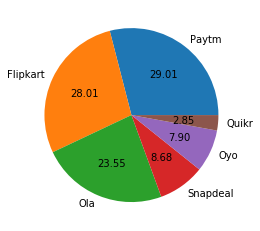

Paytm 29.01
Flipkart 28.01
Ola 23.55
Snapdeal 8.68
Oyo 7.90


In [90]:
df = pd.read_csv('startup_funding.csv')

# corrections made using main
x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})

# to check corrections
# names = df['StartupName']
# main2 = set()
# for x in names:
#     if 'ola' in x.lower() or 'flipkart' in x.lower() or 'oyo' in x.lower() or 'paytm' in x.lower():
#         main2.add(x)
# main2

df['AmountInUSD'].fillna('0',inplace = True)
d = {}
for i,row in df.iterrows():
    name = row['StartupName']
    funds = row['AmountInUSD']
    funds = float(''.join(funds.split(',')))
    d[name] = d.get(name,0)+funds

d = sorted(d.items(), key=lambda x: x[1], reverse=True)[:6]

names = []
funds = []

for t in d:
    if type(t[0])==str:
        names.append(t[0])
        funds.append(t[1])
            
plt.pie(funds,labels = names,autopct='%.2f')
plt.show()

for i in range(5):
    p = round((funds[i]/sum(funds))*100,2)
    print(names[i],'{:.2f}'.format(p))

## Question 7
   
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
 - Print the startup name in descending order with respect to the number of funding round as integer value.
 - Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names. ignore correcting all, just handle important ones.  
Output Format :
startup1 number1
startup2 number2
startup3 number3
. . . 

In [24]:
df = pd.read_csv('startup_funding.csv')
x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})

d = {}
for _,row in df.iterrows():
    x = row['StartupName']
    d[x]= d.get(x,0)+1

d = sorted(d.items(), key=lambda x: x[1], reverse=True)[:6]

names = []
counts = []

for t in d:
    if type(t[0])==str:
        names.append(t[0])
        counts.append(t[1])
            
for i in range(5):
    print(names[i],counts[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


## Question 8
  
Find the Investors who have invested maximum number of times. Print the investor name and number of times invested as integer value.
Note:  
 - In startup, multiple investors might have invested. So consider each investor for that startup.
 - Ignore the undisclosed investors.
 - Output as investorname number

In [150]:
df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [22]:
# df['InvestorsName'].fillna('0',inplace = True)
# unknown = set()
# for _, row in df.iterrows():
#     name = row['InvestorsName']
#     if 'undisclosed' in name.lower():
#         unknown.add(name)

In [23]:
# unknown

In [1]:
# n = list(df['InvestorsName'])
# n

In [18]:
df['InvestorsName'].fillna('0',inplace = True)
d = {}
for _,row in df.iterrows():
    x = row['InvestorsName']
    names = x.replace('&',',').split(',')
    for name in names:
        if 'undisclosed' in name.lower():
            break
        else:
            name = name.strip()
            d[name]=d.get(name,0)+1

In [7]:
d = sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]
for t in d:
    print(t[0],t[1])

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40
